# Определение наиболее перспективной игровой платформы и жанра.

Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB

Задачи:

- Осуществить предобработку данных
- Провести исследовательский анализ данных
- Составить портрет пользователя каждого региона(Определите для пользователя каждого региона (NA, EU, JP)):
  - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
  - Самые популярные жанры (топ-5). Поясните разницу.
  - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- Проверьте гипотезы:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action и Sports разные.

## Изучение данных:

In [1]:
import plotly.graph_objects as go
from scipy.stats import levene
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('/datasets/games.csv')

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

display(df.info())
display(df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E


Вывод:

Проблемы в данных - есть пропуски в столбцах (Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating). Так же имена столбцов находятся в верхнем регистре, пробелов нет.

## Предобработка данных

### Просмотр значений, изменение типов данных.

In [2]:
# Переводим имена столбцов в нижний регистр:
df.columns = df.columns.str.lower()
display(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [3]:
# Просмотрим значения в столбцах таблицы:
def view_columns(data):
    for i in data.columns:
        print(str(i))
        display(data[i].value_counts().head(10))

view_columns(df)

# Просмотрим наличие дубликатов:
display(df.duplicated().sum())

name


Need for Speed: Most Wanted     12
LEGO Marvel Super Heroes         9
Madden NFL 07                    9
FIFA 14                          9
Ratatouille                      9
FIFA 15                          8
Angry Birds Star Wars            8
Lego Batman 3: Beyond Gotham     8
LEGO Harry Potter: Years 5-7     8
Cars                             8
Name: name, dtype: int64

platform


PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: platform, dtype: int64

year_of_release


2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
Name: year_of_release, dtype: int64

genre


Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Name: genre, dtype: int64

na_sales


0.00    4508
0.02     576
0.03     561
0.04     549
0.01     545
0.05     544
0.06     503
0.07     490
0.08     446
0.09     431
Name: na_sales, dtype: int64

eu_sales


0.00    5870
0.01    1494
0.02    1308
0.03     926
0.04     709
0.05     564
0.06     411
0.07     355
0.08     307
0.09     269
Name: eu_sales, dtype: int64

jp_sales


0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
0.05      322
0.06      296
0.07      228
0.08      220
0.09      156
Name: jp_sales, dtype: int64

other_sales


0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
0.05     477
0.06     393
0.07     339
0.08     238
0.09     185
Name: other_sales, dtype: int64

critic_score


70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
80.0    237
76.0    235
72.0    226
74.0    226
77.0    225
Name: critic_score, dtype: int64

user_score


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
Name: user_score, dtype: int64

rating


E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

0

In [4]:
# Преобразование типов данных:
# Функция для приведения к типу int:
def to_integer(c):
    df[c] = df[c].astype('float32').astype('Int64') #переводим в int и сохраняем значения Nan.
        
# Приводим к типу int столбцы:
to_integer('year_of_release')

In [5]:
# Просмотрим значения столбцов, которые содержат категориальные значения:
def group_values(colmns):
    display(df.groupby(colmns)[colmns].count())

#pd.set_option('display.max_rows', None)
group_values('platform')
group_values('year_of_release')
group_values('genre')
group_values('critic_score')
group_values('user_score')
group_values('rating')

platform
2600     133
3DO        3
3DS      520
DC        52
DS      2151
GB        98
GBA      822
GC       556
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       974
PCFX       1
PS      1197
PS2     2161
PS3     1331
PS4      392
PSP     1209
PSV      430
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1320
WiiU     147
X360    1262
XB       824
XOne     247
Name: platform, dtype: int64

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: int64

genre
Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: genre, dtype: int64

critic_score
13.0     1
17.0     1
19.0     6
20.0     3
21.0     1
        ..
94.0    37
95.0    16
96.0    18
97.0    11
98.0     4
Name: critic_score, Length: 82, dtype: int64

user_score
0         1
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.4      11
9.5       6
9.6       2
9.7       1
tbd    2424
Name: user_score, Length: 96, dtype: int64

rating
AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
Name: rating, dtype: int64

Вывод:

- перевели имена столбцов в нижний регистр.
- дублирующих значений не найденно.
- просмотрели значения содержащиеся в таблице.
- привели к типу int столбец - year_of_release, т.к. содержит целые значения.
- просмотрели столбцы с категориальными значениями - ошибок, опечаток, пропусков, артефактов не найденно.

### Обработка пропусков.

In [6]:
# Заменяем значение tbd на Nan в столбце - user_score:
# Просмотрим значения tbd строках до преобразования в Nan:
display(df[df['name'] == 'Mega Brain Boost'])
display(df['user_score'].value_counts())

# Заменим значение tbd на Nan:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

# Просмотрим значения tbd строках после преобразования в Nan:
display(df[df['name'] == 'Mega Brain Boost'])
display(df['user_score'].value_counts())


# Другие варианты замены tbd на Nan:
#df.loc[df['user_score']=='tbd', 'user_score'] = np.nan
#df['user_score'] = df['user_score'].apply(lambda x: np.nan if x == 'tbd' else x)
#df['user_score'] = np.where(df['user_score']=="tbd", np.nan, df['user_score'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.0,0.0,0.0,48.0,tbd,E


tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.3       2
2.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.0,0.0,0.0,48.0,NaN,E


7.8    324
8      290
8.2    282
8.3    254
8.5    253
      ... 
1.1      2
1.3      2
2.3      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

In [7]:
# Приведем тип данных столбца - user_score с типа object к типу - float(необходимо для расчета корреляции):
# Тип данных столбца - user_score до приведения:
df.info()
display(df.head(10))

# Приводим к типуу float:
df['user_score'] = df['user_score'].astype('float32')

# Просмотрим тип данных столбца и значения - user_score после приведения:
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float32
rating             9949 non-null object
dtypes: Int64(1), float32(1), float64(5), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [8]:
# Заменим пропуски в rating на значение - unknow_rating:

# Просмотрим значения строках где NaN в столбце rating до преобразования:
display(df[df['name']=="Pokemon Red/Pokemon Blue"])

#Заполняем пропуски:
df['rating'] = df['rating'].fillna('unknow_rating')

# Проверяем замену:                  
display(df[df['name']=="Pokemon Red/Pokemon Blue"])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,NaN


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.0,NaN,NaN,unknow_rating


In [9]:
# Просмотрим пропуски в name и genre:
display(df[df['name'].isna()])
display(df[df['genre'].isna()])

# Пропуски в critic_score и user_score:
# Заменяем пропуски в critic_score и user_score исходя из медианного значения по группируемым столбцам - 'platform' и'genre'.
display(df[df['name']=="Samurai Warriors: Sanada Maru"])
display(df[df['name']=="Haitaka no Psychedelica"])

df['critic_score'] = df.groupby(['platform','genre'])['critic_score'].apply(lambda x: x.fillna(x.median()))
df['user_score'] = df.groupby(['platform','genre'])['user_score'].apply(lambda x: x.fillna(x.median()))

# Проверяем замену:
display(df[df['name']=="Samurai Warriors: Sanada Maru"])
display(df[df['name']=="Haitaka no Psychedelica"])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknow_rating
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknow_rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknow_rating
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknow_rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14689,Samurai Warriors: Sanada Maru,PS4,2016,Action,0.0,0.0,0.03,0.0,NaN,NaN,unknow_rating
16323,Samurai Warriors: Sanada Maru,PSV,2016,Action,0.0,0.0,0.01,0.0,NaN,NaN,unknow_rating
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.0,0.01,0.0,NaN,NaN,unknow_rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,unknow_rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14689,Samurai Warriors: Sanada Maru,PS4,2016,Action,0.0,0.0,0.03,0.0,73.0,7.3,unknow_rating
16323,Samurai Warriors: Sanada Maru,PSV,2016,Action,0.0,0.0,0.01,0.0,70.0,7.5,unknow_rating
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.0,0.0,0.01,0.0,71.0,7.2,unknow_rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.0,0.0,0.01,0.0,72.0,7.6,unknow_rating


Вывод:

- значение tbd в столбце user_score - означает to be determined - неопределенно, т.е без оценки, переведем его в Nan.
- привели тип данных столбца - user_score к типу float.
- пропуски в name и genre имеют одинаковы строки (всего две), оставим их в таблице.
- пропуски в year_of_release оставим, данные так же оставим. Количество пропусков не значительно - 269
- заменили пропуски в critic_score и user_score исходя из медианного значения по группируемым столбцам - 'platform' и 'genre', т.к. есть зависимость оценок от жанра и платформы.

In [10]:
# Рассчитаем суммарные продажи, создаем новый столбец - total_sales:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head(2))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow_rating,40.24


## Исследовательский анализ данных.

Задание: Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?:

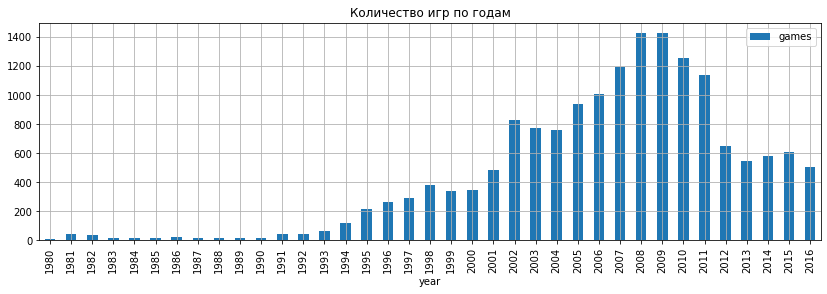

In [11]:
# Сгруппируем, отсортируем по годам количество выпускаемых игр, построим столбчатую диаграмму:
data = df['year_of_release'].value_counts().reset_index().sort_values(by = 'index', ascending=True)
data = data.rename(columns={'index': 'year', 'year_of_release': 'games' })
data.plot(x='year', figsize=(14,4), kind='bar', grid=True, title="Количество игр по годам")

Вывод:

- На диаграмме по годам можно заметить непрерывный рост выпускаемых игр с 1990 по 2011. Но уже с 2012 заметно практически двукратное падение - примерно с 1200-1400 до 600 на протяжении с 2012 по 2016.

Задание: Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

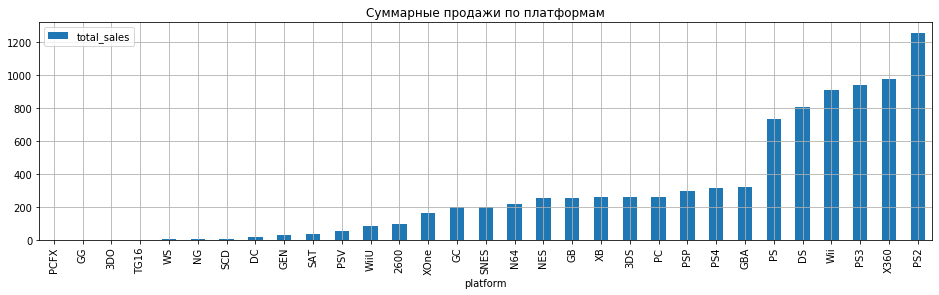

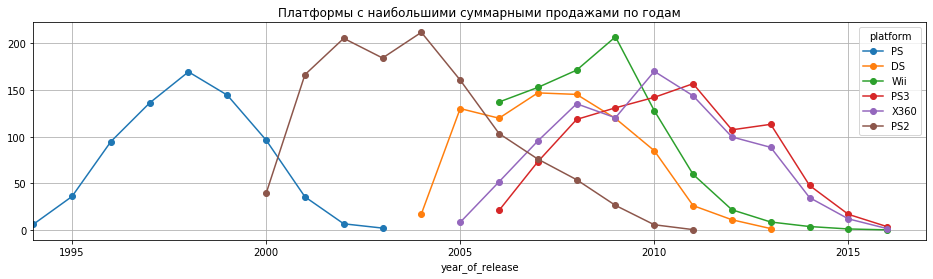

In [12]:
# Построим диаграмму суммарных продаж по каждой платформе:
data = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales')
data.plot(x='platform', figsize=(16,4), kind='bar', grid=True, title="Суммарные продажи по платформам")

# Построим распределение по годам платформ с наибольшими суммарными продажами:
data1 = df.pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum').reset_index()

# Выбираем платформы с наибольшими продажами:
list = ['PS', 'DS','Wii', 'PS3', 'X360', 'PS2']
data1.plot(x='year_of_release', y= list, xlim=(1994, 2017), style='o-', grid=True, figsize=(16,4), title="Платформы с наибольшими суммарными продажами по годам")

Вывод:

- На диаграмме суммарных продаж по платформам видно, что платформами с наибольшими продажами являются - 'PS', 'DS','Wii', 'PS3', 'X360', 'PS2'.
- На построенном графике платформ с наибольшим объемом продаж можно увидеть, что срок жизни платформ в среднем составляет 10 лет.

Задание: Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

platform,year_of_release,DS,PC,PS3,PS4,Wii,X360,XOne
0,2012,11.01,23.22,107.36,NaN,21.71,99.74,NaN
1,2013,1.54,12.38,113.25,25.99,8.59,88.58,18.96
2,2014,NaN,13.28,47.76,100.00,3.75,34.74,54.07
3,2015,NaN,8.52,16.82,118.90,1.14,11.96,60.14
4,2016,NaN,5.25,3.60,69.25,0.18,1.52,26.15


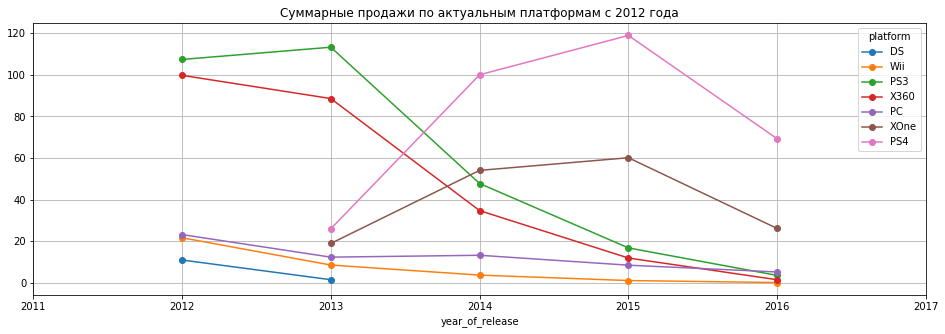

In [13]:
#Выберем новые платфрмы и платформы у которых есть продажи на 2012 - 2016 год:
list = ['DS', 'Wii', 'PS3', 'X360', 'PC', 'XOne', 'PS4']

# Строим график по продажам платформ с 2012 по 2016 годы:
df_2012_platform = df.query('year_of_release >= 2012 and platform in @list')
df_2012_platform = df_2012_platform.pivot_table(index=['year_of_release'], values='total_sales', columns='platform', aggfunc='sum').reset_index()
df_2012_platform.plot(x='year_of_release', y= list, xlim = (2011, 2017), style='o-', grid=True, figsize=(16,5), title="Суммарные продажи по актуальным платформам с 2012 года")

# Проверяем выборку по платформам и году:
display(df_2012_platform)

Вывод:

Платформа Wii показывает очень не высокие продажи, PS3, X360, буквально рухнули в продажах c 2013 по 2015 год. Выберем актуальный период с 2013 - 2016 год, т.к. это старт новых платформ - PS4 и XOne. А так же платформу PC, являющуюся долгоживущей платформой, все три PS4 и XOne и PC являются потенциально прибыльными.

In [14]:
# Выбираем период 2013 - 2016 год и потенциально прибыльные платформы - PS4, XOne, PC:
list = ['PC', 'XOne', 'PS4']
df_2013_platform = df.query('year_of_release >= 2013 and platform in @list')
display(df_2013_platform)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,76.0,6.9,unknow_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,76.0,6.9,unknow_rating,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,78.0,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,74.0,6.8,unknow_rating,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,unknow_rating,0.01
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.8,M,0.01


Задание: Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

count    189.000000
mean       0.208624
std        0.352304
min        0.010000
25%        0.030000
50%        0.080000
75%        0.230000
max        3.050000
Name: total_sales, dtype: float64

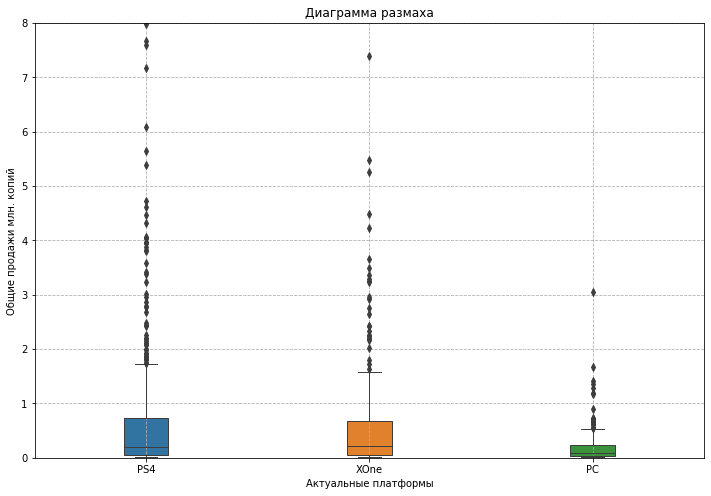

In [15]:
# Функция для просмотра основных характеристик значений - total_sales:
def describ(pltf):
    data = df_2013_platform[df_2013_platform['platform']==pltf]
    display(data['total_sales'].describe())

# Вызываем функцию и передаем в качестве параметра - наименование платформы:
describ('PS4')
describ('XOne')
describ('PC')
    
# Построим диаграмму размаха:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="platform", y="total_sales", data=df_2013_platform, linewidth=1,  width=0.2)
ax.set_ylim(0,8)
ax.set_title('Диаграмма размаха')
ax.set_xlabel('Актуальные платформы')
ax.set_ylabel('Общие продажи млн. копий')
ax.grid(linestyle='--')

Вывод: Основные характеристики значений 'total_sale' для PS4 и XOne среднее и медиана - схожи как и границы "усов". Те же характеристики для платформы PC значительно меньше.

Задание: Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

critic_score    0.334769
dtype: float64

user_score   -0.072033
dtype: float64

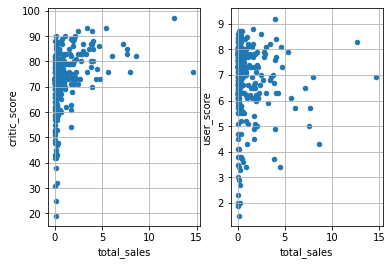

In [16]:
# выбираем платформу - PS4, Рассчитываем корреляцию и строим диаграммы рассеивания:
df_for_corr_PS4 = df_2013_platform.query('platform == "PS4"')

# Расчет корреляции:
display(df_for_corr_PS4[['critic_score']].corrwith(df_for_corr_PS4['total_sales']))
display(df_for_corr_PS4[['user_score']].corrwith(df_for_corr_PS4['total_sales']))

# Строим диаграммы рассеивания:
fig, axes = plt.subplots(ncols = 2)
df_for_corr_PS4.plot(x='total_sales', y='critic_score', kind='scatter', grid=True, ax=axes[0])
df_for_corr_PS4.plot(x='total_sales', y='user_score', kind='scatter', grid=True, ax=axes[1])

Вывод: Продажи не коррелируют с оценками пользователей, корреляция - -0.072033. И так же заметна небольшая корреляция продаж с оценками критиков, корреляция - 0.334769.

Задание: Соотнесите выводы с продажами игр на других платформах.

,user_score,critic_score,total_sales
user_score,1.000000,0.395654,-0.057301
critic_score,0.395654,1.000000,0.251241
total_sales,-0.057301,0.251241,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d95437290>,
      dtype=object)

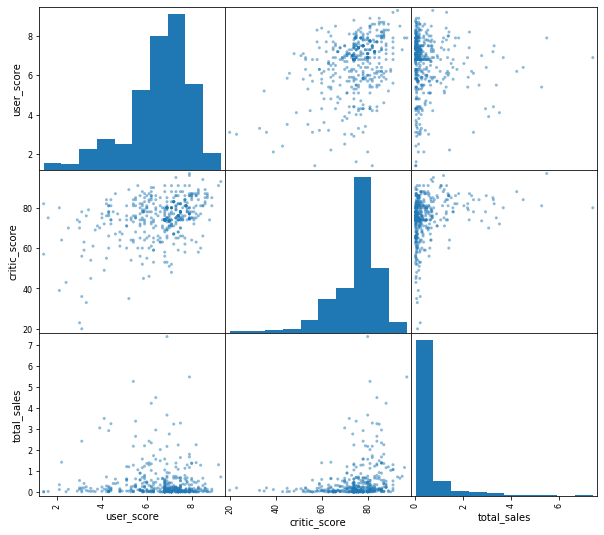

In [17]:
# Проводим расчеты корреляции и строим матрицу диаграмм рассеивания для остальных платформ:
df_for_corr_other = df_2013_platform.query('platform != "PS4"')
df_for_corr_other = df_for_corr_other[['user_score','critic_score','total_sales']]
display(df_for_corr_other.corr())
pd.plotting.scatter_matrix(df_for_corr_other, figsize=(10, 9))

Вывод: Продажи не коррелируют с оценками пользователей, корреляция - 0.057301. И так же заметна небольшая корреляция продаж с оценками критиков, корреляция - 0.251241. Значение корреляции критиков и продаж имеет еще меньшее значение чем для расчитанной ранее платформы - PS4.

Задание: Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

,eu_sales,jp_sales,na_sales,other_sales,total_sales
genre,,,,,
Shooter,62.76,2.97,72.77,20.23,158.73
Action,59.79,5.95,56.46,18.47,140.67
Sports,36.45,1.01,35.48,11.37,84.31
Role-Playing,18.15,3.56,17.25,5.45,44.41
Racing,12.90,0.31,7.01,2.68,22.90
Misc,5.64,0.43,8.27,1.99,16.33
Fighting,3.60,0.76,5.26,1.58,11.20
Simulation,6.80,0.18,2.21,0.84,10.03
Adventure,4.63,0.48,3.25,1.17,9.53


,sum,median,mean,min,max
,total_sales,total_sales,total_sales,total_sales,total_sales
genre,,,,,
Action,140.67,0.13,0.504194,0.01,12.62
Adventure,9.53,0.06,0.179811,0.01,1.66
Fighting,11.20,0.16,0.414815,0.02,2.78
Misc,16.33,0.18,0.379767,0.01,4.32
Platform,8.69,0.16,0.457368,0.01,1.91
Puzzle,0.02,0.02,0.020000,0.02,0.02
Racing,22.90,0.10,0.416364,0.01,2.42
Role-Playing,44.41,0.18,0.535060,0.01,7.17


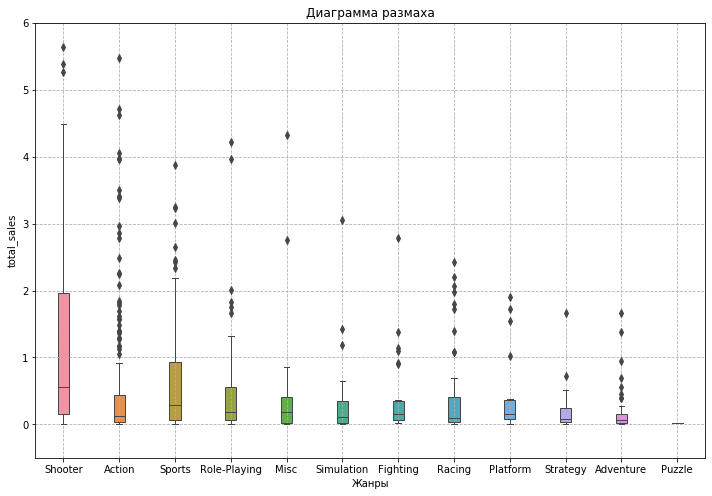

In [18]:
# Выделим игры по жанрам:
column_list=['na_sales','eu_sales','jp_sales','other_sales','total_sales']
genre_sales = df_2013_platform.pivot_table(index='genre', values=column_list, aggfunc='sum').sort_values(by='total_sales', ascending=False)
display(genre_sales)

genre_sales_stat = df_2013_platform.pivot_table(index='genre', values='total_sales', aggfunc=['sum','median','mean','min','max'])
display(genre_sales_stat)

# Построим диаграммы распределения для жанров:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="genre", y="total_sales", data=df_2013_platform, linewidth=1,  width=0.2)
ax.set_ylim(-0.5,6)
ax.set_title('Диаграмма размаха')
ax.set_xlabel('Жанры')
ax.grid(linestyle='--')

Вывод: Самые прибыльные жанры - Shooter, Action и Sports, среднее значение общих продаж этих жанров в трое превышает медиану, что говорит о том, что в жанрах присутствуют большие значения, т.е. иногда встречаются хиты продаж . Жанрами с низкими продажами являются - Fighting, Simulation, Adventure, Platform, Strategy, Puzzle.

## Составление пользовательского портрета по регионам:

Задание: Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [19]:
# Задаем список регионов продаж:
region_list = ['na_sales','eu_sales', 'jp_sales', 'other_sales', 'total_sales']

# Рассчитаем сводную таблицу для платформ:
top3_platform = df_2013_platform.pivot_table(index='platform', values=region_list, aggfunc='sum').reset_index()

# Рассчитаем доли продаж:
def sum_column(data, column):
    data[column] = data[column] / data[column].sum()

sum_column(top3_platform, 'na_sales')
sum_column(top3_platform, 'eu_sales')    
sum_column(top3_platform, 'jp_sales')
sum_column(top3_platform, 'other_sales')
display("Доли продаж платформ регионам: ", top3_platform)

# Рассчитаем сводную таблицу для жанров:
top3_genre = df_2013_platform.pivot_table(index='genre', values=region_list, aggfunc='sum').reset_index()
sum_column(top3_genre, 'na_sales')
sum_column(top3_genre, 'eu_sales')    
sum_column(top3_genre, 'jp_sales')
sum_column(top3_genre, 'other_sales')
display("Доли продаж жанров регионам: ", top3_genre)

'Доли продаж платформ регионам: '

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,PC,0.116309,0.000000,0.052167,0.045136,39.43
1,PS4,0.647083,0.979141,0.510588,0.737267,314.14
2,XOne,0.236608,0.020859,0.437245,0.217597,159.32


'Доли продаж жанров регионам: '

,genre,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,Action,0.274216,0.365031,0.265108,0.281641,140.67
1,Adventure,0.021235,0.029448,0.015260,0.017841,9.53
2,Fighting,0.016511,0.046626,0.024698,0.024093,11.20
3,Misc,0.025867,0.026380,0.038832,0.030345,16.33
4,Platform,0.018345,0.030061,0.013946,0.018756,8.69
5,Puzzle,0.000092,0.000000,0.000000,0.000000,0.02
6,Racing,0.059163,0.019018,0.032915,0.040866,22.90
7,Role-Playing,0.083242,0.218405,0.080997,0.083105,44.41
8,Shooter,0.287837,0.182209,0.341691,0.308478,158.73
9,Simulation,0.031187,0.011043,0.010377,0.012809,10.03


Вывод:

- Во всех регионах доля продаж платформы - PS4 занимает значительно больше половины, в японском регионе почти 100% (Япония родина платформы PS4). Платформа XOne только в Северной Америке занимает значительную долю продаж - почти 44%.
- Самые популярные жанры это Action, Shooter, Sport, Role-Playing и Misc. Жанры Action и Shooter лидируют во всех регионах.

Задание: Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [20]:
# Сделаем сводную таблицу рейтинга и среднего и медианного значения продаж:
df_esrb_sales = df_2013_platform.pivot_table(index='rating', values='total_sales', aggfunc=['mean','median'])
display(df_esrb_sales)

,mean,median
,total_sales,total_sales
rating,,
E,0.660078,0.135
E10+,0.464118,0.330
M,1.034811,0.365
T,0.454423,0.135
unknow_rating,0.399514,0.080


Вывод: Наибольшими продажами обладают игры с рейтингм - M, т.е. для взрослых, видимо потому что люди любят играть в натуралистичные шутеры, а так же игры с рейтингом E и E10+ т.е. для всех возрастов, потому что взрослые могут играть вместе со своими детьми.

## Проверка гипотез:

Проверка гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC равны.
- Ненулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [21]:
# Выделим в отдельные датасеты данные платформы - XOne и PC и рассчитаем среднее значение user_score:
df_xone = df[df['platform'] == 'XOne']
df_xone = df_xone['user_score']
display(df_xone.mean())

df_pc = df[df['platform'] == 'PC']
df_pc = df_pc['user_score']
display(df_pc.mean())

alpha = 0.05
res = st.ttest_ind(df_xone, df_pc, equal_var = True, nan_policy='omit')

display(res)
display("p-значение: ", res.pvalue)

if res.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не удалось отвергнуть нулевую гипотезу")

6.620648

7.166735

Ttest_indResult(statistic=-5.64285068302562, pvalue=2.0781497237289774e-08)

'p-значение: '

2.0781497237289774e-08

'Отвергаем нулевую гипотезу'

Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные.
- Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.
- Ненулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [22]:
# Выделим в отдельные датасты данные жанр - Action и Sport и рассчитаем среднее значение user_score:
df_action = df[df['genre'] == 'Action']
df_action = df_action['user_score']
display(df_action.mean())

df_sport = df[df['genre'] == 'Sports']
df_sport = df_sport['user_score']
display(df_sport.mean())

alpha = 0.05
res = st.ttest_ind(df_action, df_sport, equal_var = True, nan_policy='omit')

display(res)
display("p-значение: ", res.pvalue)

if res.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не удалось отвергнуть нулевую гипотезу")

7.1612854

7.23817

Ttest_indResult(statistic=-2.3632549681061046, pvalue=0.01815048520794304)

'p-значение: '

0.01815048520794304

'Отвергаем нулевую гипотезу'

Вывод: При проверке гипотез использовали метод 'scipy.stats.ttest_ind', так как поверяем гипотезы о равенстве среднего двух генеральных совокупностей. Нулевая гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC равны - отвергнута. Нулевая гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports равны так же отвергнута.